Code taken From Suchy et al. ([Suchyetal_NPGOpaper/notebooks/Figure5_PhytoplanktonBiomass.ipynb](https://github.com/SalishSeaCast/Suchyetal_NPGOpaper/blob/main/notebooks/Figure5_PhytoplanktonBiomass.ipynb)) to extract monthly diatom and nanoflagellate biomass from 201905 to match data from [Suchy et al., 2025](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2024JC021036)

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
import cmocean
from scipy.stats import sem
import scipy.stats as stats

In [3]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

### Import monthly files for Diatoms

In [8]:
#years, months, data
monthly_array_diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# flagellates_depthintorary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data #100 m 
            # change 27 to 40 for whole water column
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [9]:
monthly_array_diatoms_depthint_slice[monthly_array_diatoms_depthint_slice == 0 ] = np.nan
monthly_array_diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_depthint_slicemean))

(14, 12)


In [11]:
np.savetxt("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/SSC201905_monthly_diatoms.csv", monthly_array_diatoms_depthint_slicemean, delimiter = ",")

### Import monthly files for nanoflagellates

In [12]:

#years, months, data
monthly_array_flagellates_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['flagellates']
# flagellates_depthintorary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_flagellates_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['flagellates']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0) 

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data 
            q2 = q[0,:,:]
            monthly_array_flagellates_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['flagellates']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

In [13]:
monthly_array_flagellates_depthint_slice[monthly_array_flagellates_depthint_slice == 0 ] = np.nan
monthly_array_flagellates_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_flagellates_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_flagellates_depthint_slicemean))

(14, 12)


In [14]:
np.savetxt("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/SSC201905_monthly_flagellate.csv", monthly_array_flagellates_depthint_slicemean, delimiter = ",")

In [27]:
ssc_diatom_monthly_mean = monthly_array_diatoms_depthint_slicemean.mean(axis=0).flatten()
ssc_diatom_std = monthly_array_diatoms_depthint_slicemean.std(axis=0).flatten()

ssc_flagellates_monthly_mean = monthly_array_flagellates_depthint_slicemean.mean(axis=0).flatten()
ssc_flagellates_std = monthly_array_flagellates_depthint_slicemean.std(axis=0).flatten()


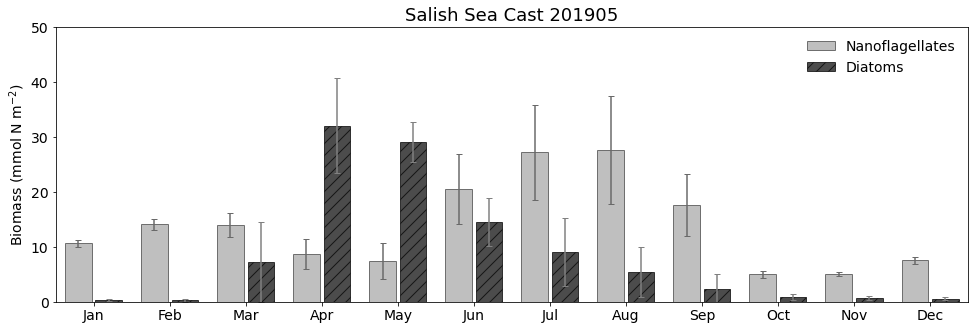

In [39]:
fig, ax = plt.subplots(figsize=(14, 5))

fig.tight_layout(pad=2.5)

bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 1}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=np.arange(len(ssc_diatom_monthly_mean)) 

width=0.35

ax.bar(xticks-0.2, ssc_flagellates_monthly_mean,width,yerr=ssc_flagellates_std,color='grey',ecolor='dimgrey',edgecolor='k',label='Nanoflagellates',alpha=0.5,capsize=3) #wheat
#ax[0].fill_between(xticks,NPGO_C_F_mean,color='dimgrey',alpha=.2,label='Nanoflagellates') #wheat
ax.bar(xticks + 0.2, ssc_diatom_monthly_mean,width,yerr=ssc_diatom_std,color='k',ecolor='grey',edgecolor='k',hatch='//',alpha=0.7,capsize=3,label='Diatoms') #lightgreen
#ax[0].fill_between(xticks,NPGO_C_D_mean,color='black',hatch='//',alpha=.3,label='Diatoms') #lightgreen
ax.set_title('SalishSeaCast Monthly Average 2007-2020',fontsize=16)
ax.legend(frameon=False,loc=1,fontsize=14)
ax.set_ylim(0,50)
ax.set_xlim(-.5,11.5)
ax.set_ylabel('Biomass (mmol N m$^{-2}$)',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
#ax.text(-.25, 45, "(a)", color='k',fontsize=14)
ax.set_xticks(xticks)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"));